In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
sns.set()

In [2]:
data1 = pd.read_csv('ex2data1.txt', header = None, names = ['exam1', 'exam2', 'y'])
data1['ones'] = pd.Series(np.ones(100), dtype = int)
data1 = data1[['ones', 'exam1', 'exam2', 'y']]
X = np.array(data1.iloc[:, 0:3])
y = np.array(data1.iloc[:, 3:])

In [3]:
def plotData(data, position1, position2, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data.iloc[:, len(data.columns) - 1] == 0
    pos = data.iloc[:, len(data.columns) - 1] == 1
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos].iloc[:, position1], data[pos].iloc[:, position2], marker = '+', c = 'k', s = 50, linewidth = 2, label = label_pos)
    axes.scatter(data[neg].iloc[:, position1], data[neg].iloc[:, position2], c = 'r', s = 50, label = label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(loc = 1, frameon= False);

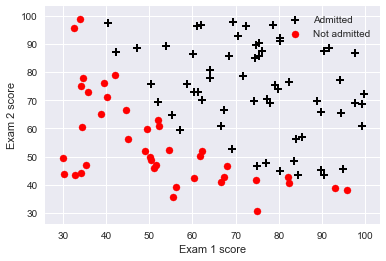

In [4]:
plotData(data1, 1, 2, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

In [4]:
def gFunction(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def hFunction(theta, X):
    theta = np.array(theta).T
    h = np.array(gFunction(np.round(np.dot(X, theta), 4)))
    return h

In [6]:
def costFunction(theta, X, y):
    m = y.size
    h = hFunction(theta, X)
    j = (-1 / m) * (np.dot((np.log(h)).T, y) + np.dot((np.log(1-h)).T, (1-y)))
    return j
    
costFunction([0, 0, 0], X, y)

array([ 0.69314718])

In [7]:
def gradientDescent(theta, X, y):
    m = y.size
    h = hFunction(theta, X).reshape(100, 1)
    gradient = (1 / m) * np.dot(X.T, (h - y))
    return gradient.flatten()

gradientDescent([0, 0, 0], X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [92]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradientDescent(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 [ 0.69314718]
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [93]:
optimum = sc.optimize.minimize(costFunction, initial_theta, args = (X, y), method = None, jac = gradientDescent, options={'maxiter' : 400})
optimum

c:\users\hamed\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


      fun: 0.20349752799411153
 hess_inv: array([[  2.54559223e+03,  -2.10261087e+01,  -2.10692117e+01],
       [ -2.10261087e+01,   1.78635279e-01,   1.70224582e-01],
       [ -2.10692117e+01,   1.70224582e-01,   1.78998548e-01]])
      jac: array([-0.00035807, -0.02103802, -0.02258392])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 98
      nit: 15
     njev: 87
   status: 2
  success: False
        x: array([-25.18524466,   0.20641081,   0.20158473])

In [8]:
def predict(theta, x):
    predict = hFunction(theta, x) >= 0.5
    return predict.astype('int')

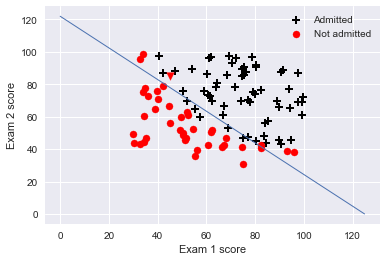

In [95]:
plotData(data1, 1, 2, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plt.plot([0, 124.888], [122.005, 0], label='line 1', linewidth = 1)

In [9]:
data2 = pd.read_csv('ex2data2.txt', header = None, names = ['Microchip Test 1', 'Microchip Test 2', 'y'])
y2 = np.array(data2.iloc[:, 2]).reshape(118, 1)
X2 = np.array(data2.iloc[:, 0:2])

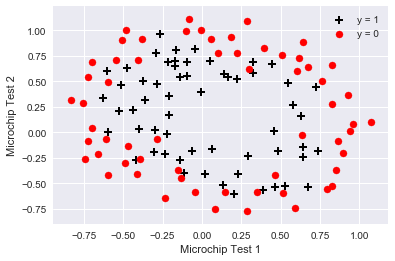

In [97]:
plotData(data2, 0, 1, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [10]:
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2.iloc[:, 0:2])
XX.shape

(118, 28)

In [11]:
def regularizedCostFunction(theta, X, y, λ = 1):
    m = y.size
    h = hFunction(theta, X).reshape(-1, 1)
    j = ((-1 / m) * (np.dot((np.log(h)).T, y) + np.dot((np.log(1-h)).T, (1-y)))) + (λ / (2 *  m)) * np.sum(np.square(theta[1:]))
    return j

In [12]:
def regularizedGradientDescent(theta, X, y, λ = 1):
    m = y.size
    h = hFunction(theta, X).reshape(118, 1)
    theta[0] = 0
    gradient = (1 / m) * np.dot(X.T, (h - y)) + (λ / m * theta).reshape(-1, 1)
    return gradient.flatten()

In [13]:
initial_theta2 = np.zeros(XX.shape[1])
print(regularizedCostFunction(initial_theta2, XX, y2))
print(regularizedGradientDescent(initial_theta2, XX, y2))
optimum2 = sc.optimize.minimize(regularizedCostFunction, initial_theta2, args = (XX, y2), method = None, jac = regularizedGradientDescent, options = {'maxiter':3000})
print((optimum2.x).shape)

[[ 0.69314718]]
[  8.47457627e-03   1.87880932e-02   7.77711864e-05   5.03446395e-02
   1.15013308e-02   3.76648474e-02   1.83559872e-02   7.32393391e-03
   8.19244468e-03   2.34764889e-02   3.93486234e-02   2.23923907e-03
   1.28600503e-02   3.09593720e-03   3.93028171e-02   1.99707467e-02
   4.32983232e-03   3.38643902e-03   5.83822078e-03   4.47629067e-03
   3.10079849e-02   3.10312442e-02   1.09740238e-03   6.31570797e-03
   4.08503006e-04   7.26504316e-03   1.37646175e-03   3.87936363e-02]
(28,)


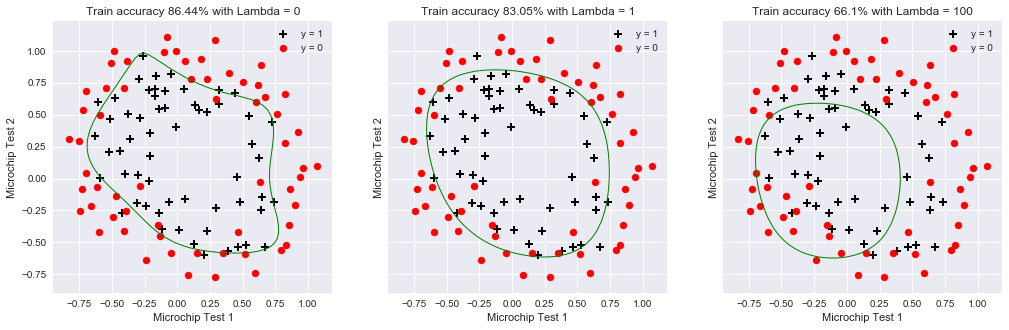

In [16]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))
for i, C in enumerate([0, 1, 100]):
    optimum3 = sc.optimize.minimize(regularizedCostFunction, initial_theta2, args = (XX, y2, C), method = None, jac = regularizedGradientDescent, options = {'maxiter':2000})
    accuracy = 100 * sum(predict(optimum3.x, XX) == y2.ravel())/y2.size
    plotData(data2, 0, 1, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    x1_min, x1_max = XX[:,1].min(), XX[:,1].max()
    x2_min, x2_max = XX[:,2].min(), XX[:,2].max()
    xx, yy = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    test = poly.fit_transform(np.c_[xx.ravel(), yy.ravel()])
    h = hFunction(optimum3.x, test)
    h = h.reshape(xx.shape)
    axes.flatten()[i].contour(xx, yy, h, [0.5], linewidths=1, colors='g')
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, 2), C))